1970년대 보스턴 지역의 주택 가격 예측 -> 회귀

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.boston_housing import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split = 0.2,
                                                 seed = 777)

57344/57026 [==============================] - 0s 0us/step


데이터 형태 확인하기

In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [3]:
y_train

array([22.5,  8.3, 17.2, 25. , 28.5, 23. , 18.9, 50. , 15.6, 38.7, 24.6,
       23.3,  9.5, 20. , 18.3, 36.4,  5. , 19.4, 28.1, 17.8, 19.6, 24.5,
       10.4, 23.7, 19.4, 23.9, 21.4, 29.9, 24.4, 23.1, 25. , 30.1, 22.8,
       22.8, 22. , 24.8, 15.6, 22. , 19.6, 13.1, 22.5, 18.9, 14.6, 13.3,
       17.4, 20.8, 10.8, 21.4, 17.2, 13.8, 28.7, 35.1, 10.2, 21.7, 20.5,
       25. , 21.1, 15.6, 23.6, 23.2, 28.7, 16.6, 26.2,  9.6, 18.2, 31.7,
       42.8, 16.1, 22.6, 18.1, 23.8, 11.8, 16. , 21.5, 13.9, 11.7, 44.8,
       20.1, 50. , 22.1, 20.6, 14.6, 48.8, 22.9, 14.4, 23.9, 15.6, 19.9,
       20.5,  8.7, 26.5, 20.3, 23.8, 44. , 18.5, 17.5, 22.8, 14.3, 10.9,
       36.1, 25. , 17.9, 17.7, 35.2, 20. , 24.3, 32.9, 15. , 50. , 33.8,
       21.9, 28.4, 10.2, 12. , 17.1, 17.1, 22. , 25.1, 20.9, 37.6, 15.6,
       43.5, 17.8, 20. , 15.2, 21.1, 19.9, 22.6, 14.4, 13.8, 37.3, 12.5,
       11.7, 26.6,  7.2, 18.6, 29. , 14.9, 14.2, 20.5, 19. , 50. , 27.1,
       18.4, 20.7, 29.6, 35.4, 21.7, 43.8, 22.6, 19

데이터 전처리 및 검증 데이터셋 만들기

In [4]:
import numpy
numpy.set_printoptions(suppress = True)

print(x_train[0])

[  0.25199   0.       10.59      0.        0.489     5.783    72.7
   4.3549    4.      277.       18.6     389.43     18.06   ]


In [5]:
# 데이터 전처리 -> 표준화(Standardization)
mean = numpy.mean(x_train, axis = 0)
std = numpy.std(x_train, axis = 0)

# 데이터(훈련, 테스트 데이터 모두) - 평균 / 표준편차(Standardization)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
print(x_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


In [6]:
# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.33,
                                                  random_state = 777)

In [7]:
print(x_train.shape, x_val.shape)

(270, 13) (134, 13)


모델 구성하기

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (13,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # 하나의 값을 출력 -> 주택가격  ...linear가 디폴트라 안적어줬음

모델 설정하기

In [9]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'mse']) # 앱솔루트, 스퀘어

모델 학습하기

In [10]:
history = model.fit(x_train, y_train,
                    epochs = 300,
                    validation_data = (x_val, y_val))

Epoch 1/300
9/9 [==============================] - 1s 25ms/step - loss: 551.7413 - mae: 21.8481 - mse: 551.7413 - val_loss: 598.8625 - val_mae: 22.2893 - val_mse: 598.8625
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 521.0452 - mae: 21.1547 - mse: 521.0452 - val_loss: 566.5000 - val_mae: 21.5556 - val_mse: 566.5000
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 489.6719 - mae: 20.3870 - mse: 489.6719 - val_loss: 530.5701 - val_mae: 20.7126 - val_mse: 530.5701
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 453.3667 - mae: 19.5045 - mse: 453.3667 - val_loss: 489.8068 - val_mae: 19.7132 - val_mse: 489.8068
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 411.9903 - mae: 18.4437 - mse: 411.9903 - val_loss: 441.2379 - val_mae: 18.4682 - val_mse: 441.2379
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 363.9656 - mae: 17.1646 - mse: 363.9656 - val_loss: 385.0041 - val_mae: 1

모델 결과 그리기

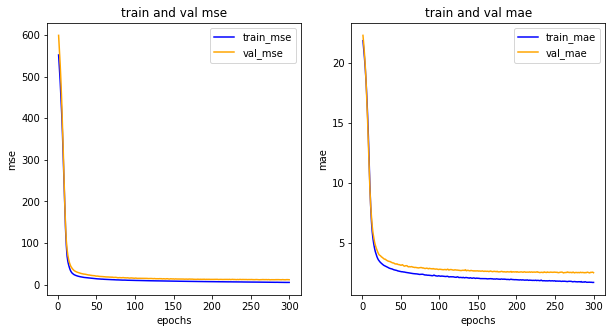

In [11]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

모델 평가하기

In [12]:
model.evaluate(x_test, y_test)  # mae 2.3 -> 실제 집값과 2,700 달러 정도 차이

4/4 [==============================] - 0s 2ms/step - loss: 9.1781 - mae: 2.2203 - mse: 9.1781


[9.178078651428223, 2.2202646732330322, 9.178078651428223]

모델 예측하기

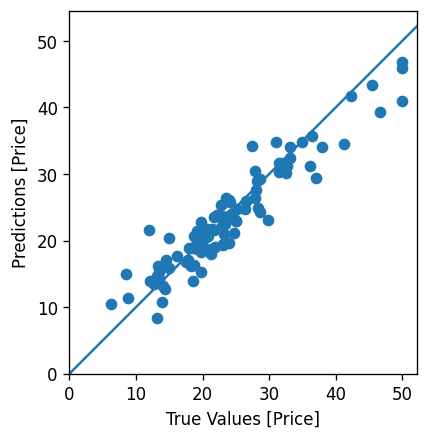

In [13]:
test_predictions = model.predict(x_test).flatten()

plt.figure(dpi = 120)
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])